In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

**Type of data selected:** <br>Data from Zillow, listed properties <br>Real Estate Trend Data in Bay Area<br> Home Affordability Index Data <br> Unemployment Data <br> Crime Rate Data <br> School Rating Data <br>

In [2]:
# load all the data

zillow_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/SFdata')

trends_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/trends_data')

HAI_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/HAI_data')

unemployment_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/unemployment_data')

crime_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/crime_data')

school_data = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/school_ratings')

In [3]:
zillow_data.head(3)

,propertyType,lotAreaValue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf
0,SINGLE_FAMILY,3001.284,"1723 11th Ave, San Francisco, CA 94122",995000,2.0,-122.46822,37.75599,15111551,1.0,1038.0,False,False,San Francisco,959.0
1,SINGLE_FAMILY,3125.000,"170 Thrift St, San Francisco, CA 94112",898000,4.0,-122.45815,37.71772,15192217,2.0,1845.0,False,False,San Francisco,487.0
2,SINGLE_FAMILY,2495.988,"1631 La Salle Ave, San Francisco, CA 94124",995000,4.0,-122.38945,37.73663,15156010,4.0,2430.0,False,False,San Francisco,409.0


In [4]:
zillow_data.head()

,propertyType,lotAreaValue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf
0,SINGLE_FAMILY,3001.284,"1723 11th Ave, San Francisco, CA 94122",995000,2.0,-122.46822,37.755990,15111551,1.0,1038.0,False,False,San Francisco,959.0
1,SINGLE_FAMILY,3125.000,"170 Thrift St, San Francisco, CA 94112",898000,4.0,-122.45815,37.717720,15192217,2.0,1845.0,False,False,San Francisco,487.0
2,SINGLE_FAMILY,2495.988,"1631 La Salle Ave, San Francisco, CA 94124",995000,4.0,-122.38945,37.736630,15156010,4.0,2430.0,False,False,San Francisco,409.0
3,SINGLE_FAMILY,3036.132,"411 Clipper St, San Francisco, CA 94114",998000,3.0,-122.43447,37.748610,15181544,1.0,1470.0,False,False,San Francisco,679.0
4,SINGLE_FAMILY,1746.756,"1710 33rd Ave, San Francisco, CA 94122",988000,2.0,-122.49134,37.755177,15110735,1.0,1025.0,False,False,San Francisco,964.0


In [5]:
#adding county names

conditions =[(zillow_data['city'] == 'San Francisco'),
    ((zillow_data['city'] =="San Mateo")| (zillow_data['city'] =="Redwood City")| (zillow_data['city'] =="Palo Alto")),
    ((zillow_data['city'] =="Mountain View") | (zillow_data['city'] =="Sunnyvale") |(zillow_data['city'] =="Santa Clara") | (zillow_data['city'] =="Los Gatos") |(zillow_data['city'] =="San Jose")|(zillow_data['city'] =="Milpitas")),
    ((zillow_data['city'] =="Fremont")|(zillow_data['city'] =="Pleasanton")|(zillow_data['city'] =="Livermore")|(zillow_data['city'] =="Dublin") |(zillow_data['city'] =="Castro Valley")|(zillow_data['city'] =="Piedmont")|(zillow_data['city'] =="Alameda")|(zillow_data['city'] =="Berkeley")),
    ((zillow_data['city'] =="San Ramon")|(zillow_data['city'] =="Lafayette")|(zillow_data['city'] =="Martinez")|(zillow_data['city'] =="Brentwood")),
    (zillow_data['city'] =="Benicia"),
    (zillow_data['city'] =="Larkspur")]
     
     
counties = ['San Francisco', 'San Mateo', 'Santa Clara', 'Alameda', 'Contra Costa', 'Solano', 'Marin']
     
zillow_data['county'] = np.select(conditions, counties)
     
zillow_data.head()


,propertyType,lotAreaValue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf,county
0,SINGLE_FAMILY,3001.284,"1723 11th Ave, San Francisco, CA 94122",995000,2.0,-122.46822,37.755990,15111551,1.0,1038.0,False,False,San Francisco,959.0,San Francisco
1,SINGLE_FAMILY,3125.000,"170 Thrift St, San Francisco, CA 94112",898000,4.0,-122.45815,37.717720,15192217,2.0,1845.0,False,False,San Francisco,487.0,San Francisco
2,SINGLE_FAMILY,2495.988,"1631 La Salle Ave, San Francisco, CA 94124",995000,4.0,-122.38945,37.736630,15156010,4.0,2430.0,False,False,San Francisco,409.0,San Francisco
3,SINGLE_FAMILY,3036.132,"411 Clipper St, San Francisco, CA 94114",998000,3.0,-122.43447,37.748610,15181544,1.0,1470.0,False,False,San Francisco,679.0,San Francisco
4,SINGLE_FAMILY,1746.756,"1710 33rd Ave, San Francisco, CA 94122",988000,2.0,-122.49134,37.755177,15110735,1.0,1025.0,False,False,San Francisco,964.0,San Francisco


In [6]:
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               2176 non-null   object 
 1   lotAreaValue               2176 non-null   float64
 2   address                    2176 non-null   object 
 3   price                      2176 non-null   int64  
 4   bedrooms                   2176 non-null   float64
 5   longitude                  2176 non-null   float64
 6   latitude                   2176 non-null   float64
 7   zpid                       2176 non-null   int64  
 8   bathrooms                  2176 non-null   float64
 9   livingArea                 2176 non-null   float64
 10  newConstructionType        2176 non-null   object 
 11  listingSubType.is_newHome  2176 non-null   bool   
 12  city                       2176 non-null   object 
 13  price_per_sqf              2176 non-null   float

In [7]:
#selecting property type and price per sqf columns for calculations
#selecting city and county columns for data merge

zillow_data = zillow_data.drop(['address', 'zpid'], axis=1)


In [8]:
zillow_data.head(3)

,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf,county
0,SINGLE_FAMILY,3001.284,995000,2.0,-122.46822,37.75599,1.0,1038.0,False,False,San Francisco,959.0,San Francisco
1,SINGLE_FAMILY,3125.000,898000,4.0,-122.45815,37.71772,2.0,1845.0,False,False,San Francisco,487.0,San Francisco
2,SINGLE_FAMILY,2495.988,995000,4.0,-122.38945,37.73663,4.0,2430.0,False,False,San Francisco,409.0,San Francisco


In [9]:
trends_data.head(3)

,Location,Year,Median price,Growth (%)
0,"Marin County, CA",2020-05-01,1262500.0,-0.39
1,"San Francisco, CA",2020-05-01,1472500.0,3.30
2,"Alameda County, CA",2020-05-01,859500.0,-0.06


In [10]:
#renaming Location column to county column

trends_data.rename(columns = {'Location':'county'}, inplace = True)


In [11]:
#removing words County,CA from names

trends_data['county'] = trends_data['county'].str.replace('County, CA', '')
trends_data['county'] = trends_data['county'].str.replace(', CA', '')


In [12]:
trends_data

,county,Year,Median price,Growth (%)
0,Marin,2020-05-01,1262500.0,-0.39
1,San Francisco,2020-05-01,1472500.0,3.30
2,Alameda,2020-05-01,859500.0,-0.06
3,Solano,2020-05-01,470000.0,6.80
4,San Mateo,2020-05-01,1537500.0,-0.81
5,Contra Costa,2020-05-01,640000.0,-0.78
6,Santa Clara,2020-05-01,1230000.0,1.70
7,Alameda,2020-10-01,909500.0,8.30
8,San Mateo,2020-10-01,1450000.0,7.30
9,San Francisco,2020-10-01,1400000.0,-3.90


In [13]:
#selecting only most recent data

trends_data = trends_data.loc[trends_data['Year'].isin(['2022-10-01'])]


In [14]:
trends_data.reset_index(inplace=True)

In [15]:
#dropping Year column

trends_data = trends_data.drop(columns=['Year','index'], axis=1)


In [16]:
trends_data

,county,Median price,Growth (%)
0,Marin,1530000.0,6.6
1,Solano,569000.0,1.6
2,Contra Costa,794000.0,-3.2
3,San Mateo,1529000.0,-5.6
4,Santa Clara,1385000.0,-1.1
5,Alameda,1070000.0,0.0
6,San Francisco,1422500.0,-6.7


# Merging zillow and trends data frames

In [17]:
zillow_data['county'].unique()

array(['San Francisco', 'San Mateo', 'Santa Clara', 'Alameda',
       'Contra Costa', 'Solano', 'Marin'], dtype=object)

In [18]:
trends_data['county'].unique()

array(['Marin ', 'Solano ', 'Contra Costa ', 'San Mateo ', 'Santa Clara ',
       'Alameda ', 'San Francisco'], dtype=object)

In [19]:
trends_data['county'] = trends_data['county'].str.replace('Marin ', 'Marin')
trends_data['county'] = trends_data['county'].str.replace('Solano ', 'Solano')
trends_data['county'] = trends_data['county'].str.replace('Contra Costa ', 'Contra Costa')
trends_data['county'] = trends_data['county'].str.replace('San Mateo ', 'San Mateo')
trends_data['county'] = trends_data['county'].str.replace('Santa Clara ', 'Santa Clara')
trends_data['county'] = trends_data['county'].str.replace('Alameda ', 'Alameda')

In [20]:
df1 = pd.merge(zillow_data, trends_data, on='county', how='left')

In [21]:
df1


,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf,county,Median price,Growth (%)
0,SINGLE_FAMILY,3001.2840,995000,2.0,-122.468220,37.755990,1.0,1038.0,False,False,San Francisco,959.0,San Francisco,1422500.0,-6.7
1,SINGLE_FAMILY,3125.0000,898000,4.0,-122.458150,37.717720,2.0,1845.0,False,False,San Francisco,487.0,San Francisco,1422500.0,-6.7
2,SINGLE_FAMILY,2495.9880,995000,4.0,-122.389450,37.736630,4.0,2430.0,False,False,San Francisco,409.0,San Francisco,1422500.0,-6.7
3,SINGLE_FAMILY,3036.1320,998000,3.0,-122.434470,37.748610,1.0,1470.0,False,False,San Francisco,679.0,San Francisco,1422500.0,-6.7
4,SINGLE_FAMILY,1746.7560,988000,2.0,-122.491340,37.755177,1.0,1025.0,False,False,San Francisco,964.0,San Francisco,1422500.0,-6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,SINGLE_FAMILY,8001.9720,2495000,3.0,-122.526060,37.939000,2.0,1725.0,False,False,Larkspur,1446.0,Marin,1530000.0,6.6
2172,SINGLE_FAMILY,0.2812,1995000,4.0,-122.552390,37.932980,3.0,2156.0,False,False,Larkspur,925.0,Marin,1530000.0,6.6
2173,SINGLE_FAMILY,5528.0000,1845000,2.0,-122.539505,37.932587,2.0,1550.0,False,False,Larkspur,1190.0,Marin,1530000.0,6.6
2174,CONDO,719.0000,489000,1.0,-122.534860,37.940845,1.0,706.0,False,False,Larkspur,693.0,Marin,1530000.0,6.6


In [22]:
df1.isna().sum()

propertyType                 0
lotAreaValue                 0
price                        0
bedrooms                     0
longitude                    0
latitude                     0
bathrooms                    0
livingArea                   0
newConstructionType          0
listingSubType.is_newHome    0
city                         0
price_per_sqf                0
county                       0
Median price                 0
Growth (%)                   0
dtype: int64

# Merging with HAI data


In [23]:
HAI_data.head(3)

,STATE/REGION/COUNTY,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
0,CA SFH (SAAR),36,34,42,705300,4050,121500
1,CA Condo/Townhomes,48,46,55,535500,3070,92100
2,S.F. Bay Area,33,28,37,1075250,6170,185100


In [24]:
HAI_data.rename(columns = {'STATE/REGION/COUNTY':'county'},inplace=True)
                

In [25]:
HAI_data

,county,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
0,CA SFH (SAAR),36,34,42,705300,4050,121500
1,CA Condo/Townhomes,48,46,55,535500,3070,92100
2,S.F. Bay Area,33,28,37,1075250,6170,185100
3,US,59,58,66,338730,1940,58200
4,Alameda,31,25,35,1071000,6150,184500
5,Contra Costa,45,41,50,753310,4320,129600
6,Marin,25,24,32,1445000,8290,248700
7,Napa,28,33,42,935000,5370,161100
8,San Francisco,28,25,29,1411000,8100,243000
9,San Mateo,27,24,26,1641350,9420,282600


In [26]:
#removing first four rows which does not represent county

HAI_data.drop(index=HAI_data.index[:4],inplace=True)


In [27]:
HAI_data

,county,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
4,Alameda,31,25,35,1071000,6150,184500
5,Contra Costa,45,41,50,753310,4320,129600
6,Marin,25,24,32,1445000,8290,248700
7,Napa,28,33,42,935000,5370,161100
8,San Francisco,28,25,29,1411000,8100,243000
9,San Mateo,27,24,26,1641350,9420,282600
10,Santa Clara,28,26,33,1434800,8230,246900
11,Solano,54,54,62,505750,2900,87000
12,Sonoma,39,38,48,701250,4020,120600


In [28]:
df2 = pd.merge(df1, HAI_data, on='county', how='left')

In [29]:
df2

,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,...,price_per_sqf,county,Median price,Growth (%),Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
0,SINGLE_FAMILY,3001.2840,995000,2.0,-122.468220,37.755990,1.0,1038.0,False,False,...,959.0,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000
1,SINGLE_FAMILY,3125.0000,898000,4.0,-122.458150,37.717720,2.0,1845.0,False,False,...,487.0,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000
2,SINGLE_FAMILY,2495.9880,995000,4.0,-122.389450,37.736630,4.0,2430.0,False,False,...,409.0,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000
3,SINGLE_FAMILY,3036.1320,998000,3.0,-122.434470,37.748610,1.0,1470.0,False,False,...,679.0,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000
4,SINGLE_FAMILY,1746.7560,988000,2.0,-122.491340,37.755177,1.0,1025.0,False,False,...,964.0,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,SINGLE_FAMILY,8001.9720,2495000,3.0,-122.526060,37.939000,2.0,1725.0,False,False,...,1446.0,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700
2172,SINGLE_FAMILY,0.2812,1995000,4.0,-122.552390,37.932980,3.0,2156.0,False,False,...,925.0,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700
2173,SINGLE_FAMILY,5528.0000,1845000,2.0,-122.539505,37.932587,2.0,1550.0,False,False,...,1190.0,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700
2174,CONDO,719.0000,489000,1.0,-122.534860,37.940845,1.0,706.0,False,False,...,693.0,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700


In [30]:
#checking if merge was successful and there are no nan values

df2.isna().sum()


propertyType                                   0
lotAreaValue                                   0
price                                          0
bedrooms                                       0
longitude                                      0
latitude                                       0
bathrooms                                      0
livingArea                                     0
newConstructionType                            0
listingSubType.is_newHome                      0
city                                           0
price_per_sqf                                  0
county                                         0
Median price                                   0
Growth (%)                                     0
Q32022                                         0
Q22022                                         0
Q32021                                         0
Median Home Price                              0
Monthly Payment Including Taxes & Insurance    0
Minimum Qualifying I

# Merging with Unemployment Data

In [31]:
unemployment_data.head(3)

,County,avg_rate
0,Alameda,3.15
1,Contra Costa,3.41
2,Marin,2.34


In [32]:
#changing column county name to lower case

unemployment_data.columns= unemployment_data.columns.str.lower()


In [33]:
unemployment_data.head(3)

,county,avg_rate
0,Alameda,3.15
1,Contra Costa,3.41
2,Marin,2.34


In [34]:
unemployment_data['county'].unique()

array(['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco',
       'San Mateo', 'Santa Clara', 'Solano County', 'Sonoma County'],
      dtype=object)

In [35]:
unemployment_data['county'] = unemployment_data['county'].str.replace('Solano County', 'Solano')
unemployment_data['county'] = unemployment_data['county'].str.replace('Sonoma County', 'Sonoma')


In [36]:
df3 = pd.merge(df2, unemployment_data, on='county', how='left')

In [37]:
df3

,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,...,county,Median price,Growth (%),Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income,avg_rate
0,SINGLE_FAMILY,3001.2840,995000,2.0,-122.468220,37.755990,1.0,1038.0,False,False,...,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000,2.39
1,SINGLE_FAMILY,3125.0000,898000,4.0,-122.458150,37.717720,2.0,1845.0,False,False,...,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000,2.39
2,SINGLE_FAMILY,2495.9880,995000,4.0,-122.389450,37.736630,4.0,2430.0,False,False,...,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000,2.39
3,SINGLE_FAMILY,3036.1320,998000,3.0,-122.434470,37.748610,1.0,1470.0,False,False,...,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000,2.39
4,SINGLE_FAMILY,1746.7560,988000,2.0,-122.491340,37.755177,1.0,1025.0,False,False,...,San Francisco,1422500.0,-6.7,28,25,29,1411000,8100,243000,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,SINGLE_FAMILY,8001.9720,2495000,3.0,-122.526060,37.939000,2.0,1725.0,False,False,...,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700,2.34
2172,SINGLE_FAMILY,0.2812,1995000,4.0,-122.552390,37.932980,3.0,2156.0,False,False,...,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700,2.34
2173,SINGLE_FAMILY,5528.0000,1845000,2.0,-122.539505,37.932587,2.0,1550.0,False,False,...,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700,2.34
2174,CONDO,719.0000,489000,1.0,-122.534860,37.940845,1.0,706.0,False,False,...,Marin,1530000.0,6.6,25,24,32,1445000,8290,248700,2.34


In [38]:
#checking if merge was successful and there are no nan values

df3.isna().sum()


propertyType                                   0
lotAreaValue                                   0
price                                          0
bedrooms                                       0
longitude                                      0
latitude                                       0
bathrooms                                      0
livingArea                                     0
newConstructionType                            0
listingSubType.is_newHome                      0
city                                           0
price_per_sqf                                  0
county                                         0
Median price                                   0
Growth (%)                                     0
Q32022                                         0
Q22022                                         0
Q32021                                         0
Median Home Price                              0
Monthly Payment Including Taxes & Insurance    0
Minimum Qualifying I

# Merging with Crime data


In [39]:
crime_data.head(3)

,index,California Cities,Population,Violent crime,Property crime,Burglary,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000,Crime Rate per Day
0,3,San Francisco,886007,5933,48780,4644,66.99,6.70,55.06,5.24,162.62
1,9,Berkeley,122788,618,6256,771,62.26,5.03,50.95,6.28,20.95
2,38,Santa Clara,131173,214,4748,363,40.60,1.63,36.20,2.77,14.59


In [40]:
#changing 'California Cities' to 'city'
crime_data.rename(columns={'California Cities':'city'}, inplace=True)

In [41]:
#leaving columns city, population, and crime values per 1000ppl:
crime_data = crime_data.drop(columns=['index', 'Violent crime', 'Property crime', 'Burglary', 'Crime Rate per Day'])
crime_data

,city,Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000
0,San Francisco,886007,66.99,6.70,55.06,5.24
1,Berkeley,122788,62.26,5.03,50.95,6.28
2,Santa Clara,131173,40.60,1.63,36.20,2.77
3,Alameda,78907,37.50,2.05,32.68,2.76
4,Mountain View,84599,34.86,1.95,29.11,3.79
5,Palo Alto,66938,33.58,1.28,29.62,2.67
6,San Jose,1040008,32.54,4.38,24.20,3.96
7,Milpitas,82344,30.31,1.24,26.63,2.44
8,San Mateo,106020,28.29,2.51,20.91,4.87
9,Sunnyvale,154859,26.46,1.67,21.83,2.96


In [42]:
crime_data['city'].unique()

array(['San Francisco', 'Berkeley', 'Santa Clara', 'Alameda',
       'Mountain View', 'Palo Alto', 'San Jose', 'Milpitas', 'San Mateo',
       'Sunnyvale', 'Brentwood', 'Fremont', 'Pleasanton', 'Dublin',
       'Livermore', 'Martinez', 'Benicia', 'Los Gatos', 'Lafayette'],
      dtype=object)

In [43]:
crime_data.city.nunique()

19

In [44]:
df3['city'].unique()

array(['San Francisco', 'San Mateo', 'Redwood City', 'Palo Alto',
       'Mountain View', 'Sunnyvale', 'Santa Clara', 'Los Gatos',
       'San Jose', 'Milpitas', 'Fremont', 'Pleasanton', 'Livermore',
       'Dublin', 'Castro Valley', 'San Ramon', 'Alameda', 'Piedmont',
       'Berkeley', 'Lafayette', 'Martinez', 'Benicia', 'Brentwood',
       'Larkspur'], dtype=object)

In [45]:
df3.city.nunique()

24

In [46]:
#there are 5 cities crime data missing. For the best results, collecting crime data from https://www.neighborhoodscout.com/
missing = { 
            'city':['Redwood City', 'Castro Valley', 'San Ramon', 'Piedmont', 'Larkspur'],
            'Population':[84292, 66441, 84605, 11270, 13064],
            'Total Crimes per 1000':[20.06, 13.27, 10.80, 35.14, 22.58],
            'Violent Crimes per 1000':[2.23, 2.41, 0.67, 1.77, 1.15],
            'Property Crimes per 1000':[17.83, 10.87, 10.13, 33.36, 21.43],
            'Burglary Crimes per 1000':[2.86, 3.12, 1.24, 5.86, 5.43]
}


missing_df = pd.DataFrame(missing)
display(missing_df)

,city,Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000
0,Redwood City,84292,20.06,2.23,17.83,2.86
1,Castro Valley,66441,13.27,2.41,10.87,3.12
2,San Ramon,84605,10.80,0.67,10.13,1.24
3,Piedmont,11270,35.14,1.77,33.36,5.86
4,Larkspur,13064,22.58,1.15,21.43,5.43


In [47]:
crime_data = pd.concat([crime_data, missing_df])

In [48]:
crime_data

,city,Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000
0,San Francisco,886007,66.99,6.70,55.06,5.24
1,Berkeley,122788,62.26,5.03,50.95,6.28
2,Santa Clara,131173,40.60,1.63,36.20,2.77
3,Alameda,78907,37.50,2.05,32.68,2.76
4,Mountain View,84599,34.86,1.95,29.11,3.79
5,Palo Alto,66938,33.58,1.28,29.62,2.67
6,San Jose,1040008,32.54,4.38,24.20,3.96
7,Milpitas,82344,30.31,1.24,26.63,2.44
8,San Mateo,106020,28.29,2.51,20.91,4.87
9,Sunnyvale,154859,26.46,1.67,21.83,2.96


In [49]:
#merging
df4 = pd.merge(df3, crime_data, on='city', how='left')

In [50]:
df4

,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,...,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income,avg_rate,Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000
0,SINGLE_FAMILY,3001.2840,995000,2.0,-122.468220,37.755990,1.0,1038.0,False,False,...,29,1411000,8100,243000,2.39,886007,66.99,6.70,55.06,5.24
1,SINGLE_FAMILY,3125.0000,898000,4.0,-122.458150,37.717720,2.0,1845.0,False,False,...,29,1411000,8100,243000,2.39,886007,66.99,6.70,55.06,5.24
2,SINGLE_FAMILY,2495.9880,995000,4.0,-122.389450,37.736630,4.0,2430.0,False,False,...,29,1411000,8100,243000,2.39,886007,66.99,6.70,55.06,5.24
3,SINGLE_FAMILY,3036.1320,998000,3.0,-122.434470,37.748610,1.0,1470.0,False,False,...,29,1411000,8100,243000,2.39,886007,66.99,6.70,55.06,5.24
4,SINGLE_FAMILY,1746.7560,988000,2.0,-122.491340,37.755177,1.0,1025.0,False,False,...,29,1411000,8100,243000,2.39,886007,66.99,6.70,55.06,5.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,SINGLE_FAMILY,8001.9720,2495000,3.0,-122.526060,37.939000,2.0,1725.0,False,False,...,32,1445000,8290,248700,2.34,13064,22.58,1.15,21.43,5.43
2172,SINGLE_FAMILY,0.2812,1995000,4.0,-122.552390,37.932980,3.0,2156.0,False,False,...,32,1445000,8290,248700,2.34,13064,22.58,1.15,21.43,5.43
2173,SINGLE_FAMILY,5528.0000,1845000,2.0,-122.539505,37.932587,2.0,1550.0,False,False,...,32,1445000,8290,248700,2.34,13064,22.58,1.15,21.43,5.43
2174,CONDO,719.0000,489000,1.0,-122.534860,37.940845,1.0,706.0,False,False,...,32,1445000,8290,248700,2.34,13064,22.58,1.15,21.43,5.43


In [51]:
df4.isna().sum()

propertyType                                   0
lotAreaValue                                   0
price                                          0
bedrooms                                       0
longitude                                      0
latitude                                       0
bathrooms                                      0
livingArea                                     0
newConstructionType                            0
listingSubType.is_newHome                      0
city                                           0
price_per_sqf                                  0
county                                         0
Median price                                   0
Growth (%)                                     0
Q32022                                         0
Q22022                                         0
Q32021                                         0
Median Home Price                              0
Monthly Payment Including Taxes & Insurance    0
Minimum Qualifying I

# Merging on Schools data

In [52]:
school_data.head(3)

,District,City or Town,County,Rating
0,Tamalpais,Larkspur,Marin,A+
1,San Francisco,San Francisco,San Francisco,A-
2,San Mateo,San Mateo,San Mateo,A+


In [53]:
#changing 'City or Town' to 'city'
school_data.rename(columns={'City or Town':'city'}, inplace=True)

In [54]:
school_data['city'].unique()

array(['Larkspur', 'San Francisco', 'San Mateo', 'Redwood', 'Palo Alto',
       'Mountain View', 'Sunnyvale', 'Santa Clara', 'Los Gatos',
       'San Jose', 'Milpitas', 'Fremont', 'Pleasanton', 'Livermore',
       'Dublin', 'Castro Valley', 'Alameda', 'Piedmont', 'Berkeley',
       'Lafayette', 'Martinez', 'Benicia', 'Brentwood'], dtype=object)

In [55]:
#changing "Redwood" to 'Redwood City'
school_data['city'] = school_data['city'].str.replace('Redwood', 'Redwood City')

In [56]:
data = pd.merge(df4, school_data, on='city', how='left')

In [57]:
data

,propertyType,lotAreaValue,price,bedrooms,longitude,latitude,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,...,Minimum Qualifying Income,avg_rate,Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000,District,County,Rating
0,SINGLE_FAMILY,3001.2840,995000,2.0,-122.468220,37.755990,1.0,1038.0,False,False,...,243000,2.39,886007,66.99,6.70,55.06,5.24,San Francisco,San Francisco,A-
1,SINGLE_FAMILY,3125.0000,898000,4.0,-122.458150,37.717720,2.0,1845.0,False,False,...,243000,2.39,886007,66.99,6.70,55.06,5.24,San Francisco,San Francisco,A-
2,SINGLE_FAMILY,2495.9880,995000,4.0,-122.389450,37.736630,4.0,2430.0,False,False,...,243000,2.39,886007,66.99,6.70,55.06,5.24,San Francisco,San Francisco,A-
3,SINGLE_FAMILY,3036.1320,998000,3.0,-122.434470,37.748610,1.0,1470.0,False,False,...,243000,2.39,886007,66.99,6.70,55.06,5.24,San Francisco,San Francisco,A-
4,SINGLE_FAMILY,1746.7560,988000,2.0,-122.491340,37.755177,1.0,1025.0,False,False,...,243000,2.39,886007,66.99,6.70,55.06,5.24,San Francisco,San Francisco,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,SINGLE_FAMILY,8001.9720,2495000,3.0,-122.526060,37.939000,2.0,1725.0,False,False,...,248700,2.34,13064,22.58,1.15,21.43,5.43,Tamalpais,Marin,A+
2233,SINGLE_FAMILY,0.2812,1995000,4.0,-122.552390,37.932980,3.0,2156.0,False,False,...,248700,2.34,13064,22.58,1.15,21.43,5.43,Tamalpais,Marin,A+
2234,SINGLE_FAMILY,5528.0000,1845000,2.0,-122.539505,37.932587,2.0,1550.0,False,False,...,248700,2.34,13064,22.58,1.15,21.43,5.43,Tamalpais,Marin,A+
2235,CONDO,719.0000,489000,1.0,-122.534860,37.940845,1.0,706.0,False,False,...,248700,2.34,13064,22.58,1.15,21.43,5.43,Tamalpais,Marin,A+


In [58]:
data.isna().sum()

propertyType                                    0
lotAreaValue                                    0
price                                           0
bedrooms                                        0
longitude                                       0
latitude                                        0
bathrooms                                       0
livingArea                                      0
newConstructionType                             0
listingSubType.is_newHome                       0
city                                            0
price_per_sqf                                   0
county                                          0
Median price                                    0
Growth (%)                                      0
Q32022                                          0
Q22022                                          0
Q32021                                          0
Median Home Price                               0
Monthly Payment Including Taxes & Insurance     0


In [59]:
for col in data.columns:
    print(col)

propertyType
lotAreaValue
price
bedrooms
longitude
latitude
bathrooms
livingArea
newConstructionType
listingSubType.is_newHome
city
price_per_sqf
county
Median price
Growth (%)
Q32022
Q22022
Q32021
Median Home Price
Monthly Payment Including Taxes & Insurance
Minimum Qualifying Income
avg_rate
Population
Total Crimes per 1000
Violent Crimes per 1000
Property Crimes per 1000
Burglary Crimes per 1000
District
County
Rating


In [60]:
#removing unnecessary columns from data

data = data.drop(columns=['Q32022', 'Q22022', 'Q32021', 'District', 'County'])

In [61]:
#changing column names

dict = {'propertyType':'Property Type',
'lotAreaValue': 'Lot Area (sqf)',
'price': "Property Price ($)",
'bedrooms': 'Number of Bedrooms',
'bathrooms':'Number of Bathrooms',
'livingArea':'Living Area (sqf)',
'newConstructionType':'Construction Type',
'listingSubType.is_newHome':'Listing Type',
'city':'City',
'county':'County',
'price_per_sqf': 'Price per sqf ($)',
'Median price':'Median RE Price in the Area',
'Growth (%)':'Median Price Growth (%) in the Area',
'Median Home Price':'Median Home Price',
'Monthly Payment Including Taxes & Insurance':'Monthly Payment (($)[Tax&Ins])',
'Minimum Qualifying Income':'Minimum Qualifying Income ($)',
'avg_rate': 'Unemployment Rate (%)',
'Population':'City Population',
'Rating':'School Rating'}

data.rename(columns=dict,
          inplace=True)


In [62]:
data.head()

,Property Type,Lot Area (sqf),Property Price ($),Number of Bedrooms,longitude,latitude,Number of Bathrooms,Living Area (sqf),Construction Type,Listing Type,...,Median Home Price,Monthly Payment (($)[Tax&Ins]),Minimum Qualifying Income ($),Unemployment Rate (%),City Population,Total Crimes per 1000,Violent Crimes per 1000,Property Crimes per 1000,Burglary Crimes per 1000,School Rating
0,SINGLE_FAMILY,3001.284,995000,2.0,-122.46822,37.755990,1.0,1038.0,False,False,...,1411000,8100,243000,2.39,886007,66.99,6.7,55.06,5.24,A-
1,SINGLE_FAMILY,3125.000,898000,4.0,-122.45815,37.717720,2.0,1845.0,False,False,...,1411000,8100,243000,2.39,886007,66.99,6.7,55.06,5.24,A-
2,SINGLE_FAMILY,2495.988,995000,4.0,-122.38945,37.736630,4.0,2430.0,False,False,...,1411000,8100,243000,2.39,886007,66.99,6.7,55.06,5.24,A-
3,SINGLE_FAMILY,3036.132,998000,3.0,-122.43447,37.748610,1.0,1470.0,False,False,...,1411000,8100,243000,2.39,886007,66.99,6.7,55.06,5.24,A-
4,SINGLE_FAMILY,1746.756,988000,2.0,-122.49134,37.755177,1.0,1025.0,False,False,...,1411000,8100,243000,2.39,886007,66.99,6.7,55.06,5.24,A-


In [63]:
#checking numerical and categorical values

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Property Type                        2237 non-null   object 
 1   Lot Area (sqf)                       2237 non-null   float64
 2   Property Price ($)                   2237 non-null   int64  
 3   Number of Bedrooms                   2237 non-null   float64
 4   longitude                            2237 non-null   float64
 5   latitude                             2237 non-null   float64
 6   Number of Bathrooms                  2237 non-null   float64
 7   Living Area (sqf)                    2237 non-null   float64
 8   Construction Type                    2237 non-null   object 
 9   Listing Type                         2237 non-null   bool   
 10  City                                 2237 non-null   object 
 11  Price per sqf ($)             

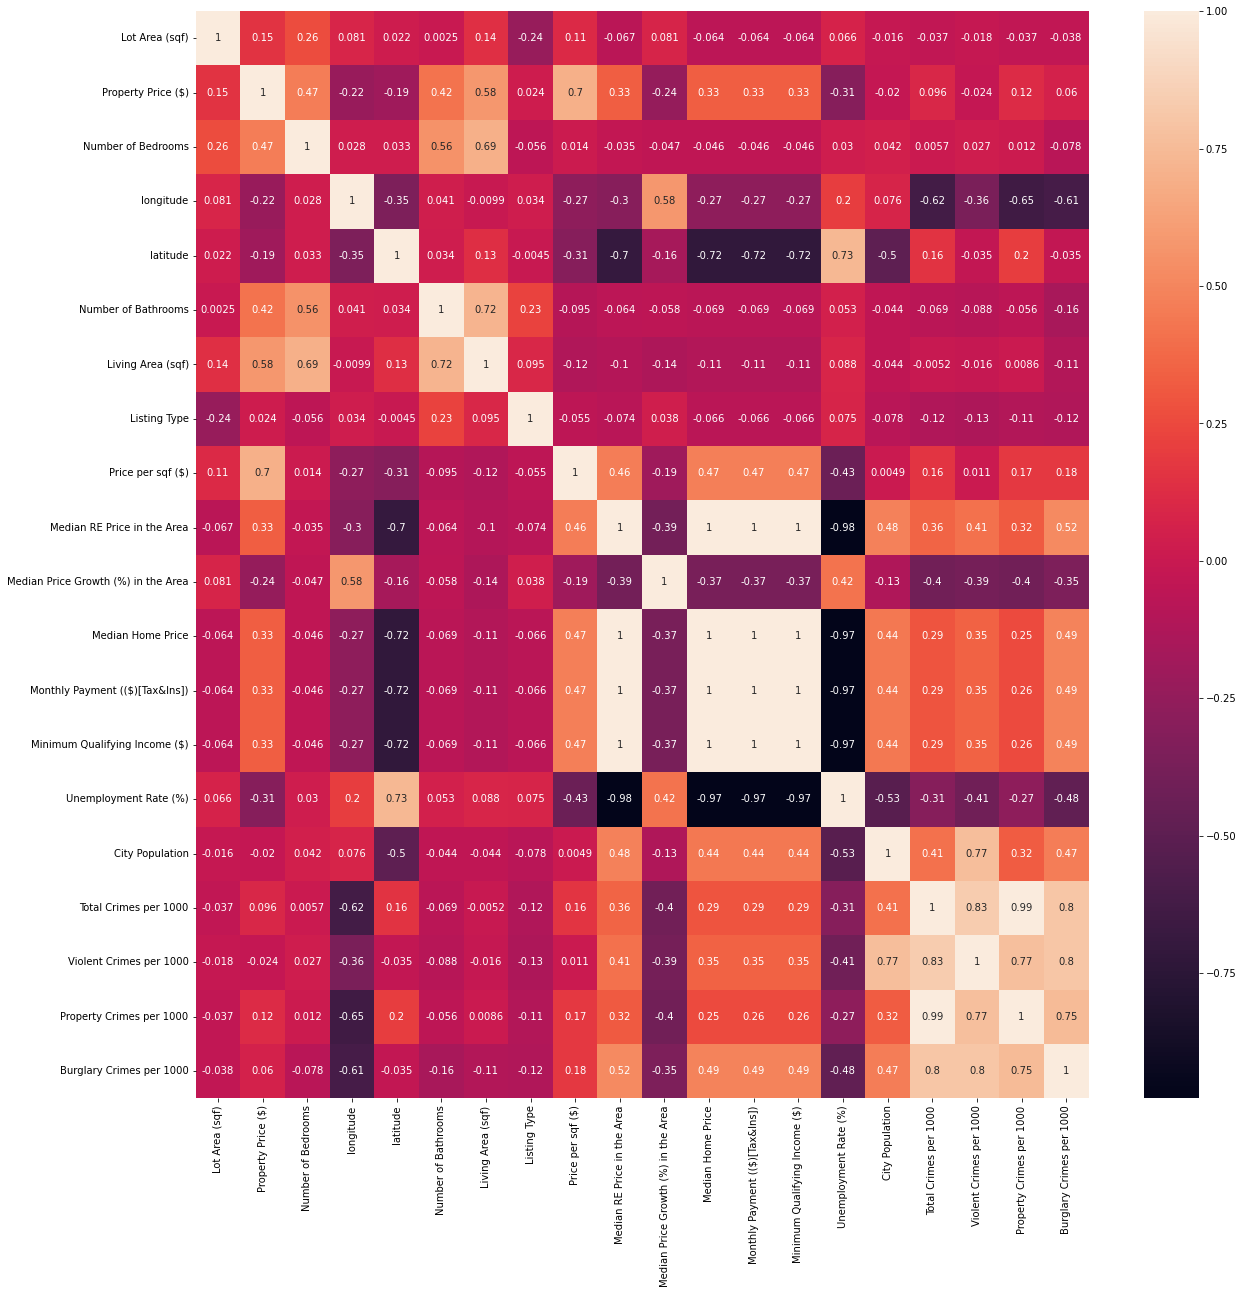

In [64]:
#Plotting correlation between features

plt.figure(figsize=(20,20))
_ = sns.heatmap(data.corr(), annot=True)

**Data has multiple values of price:** <br> Property Price($) <br> Price per sqf <br> Median RE Price in the Area (county wide)<br> Median Home Price (City Wide)<br> To avoid data leaking removing all, except Price per sqf. Although Median Home Price has higher correlation with other features than Price per sqf, this data was collected from HAI data frame with it's calculations and can show false correlation in our data.

In [65]:
data1 = data.drop(columns=['Property Price ($)','Median Home Price', 'Median RE Price in the Area'], axis=1)

# Getting Dummies

In [66]:
final_data = pd.get_dummies(data1, columns=['Property Type', 'School Rating', 'City', 'Construction Type', 
                                        'Listing Type', 'County' ], drop_first=False)

In [67]:
final_data.corr()

,Lot Area (sqf),Number of Bedrooms,longitude,latitude,Number of Bathrooms,Living Area (sqf),Price per sqf ($),Median Price Growth (%) in the Area,Monthly Payment (($)[Tax&Ins]),Minimum Qualifying Income ($),...,Construction Type_NEW_CONSTRUCTION_TYPE_OTHER,Listing Type_False,Listing Type_True,County_Alameda,County_Contra Costa,County_Marin,County_San Francisco,County_San Mateo,County_Santa Clara,County_Solano
Lot Area (sqf),1.000000,0.261957,0.080906,0.022306,0.002453,0.135934,0.107741,0.080556,-0.063633,-0.063633,...,-0.065408,0.235153,-0.235153,0.040772,0.024151,0.015513,-0.068500,-0.037723,0.004841,0.034932
Number of Bedrooms,0.261957,1.000000,0.027571,0.033122,0.557457,0.693955,0.014342,-0.046870,-0.045953,-0.045953,...,-0.034124,0.056260,-0.056260,-0.015101,0.038173,-0.021022,0.110769,-0.080143,-0.028560,0.007785
longitude,0.080906,0.027571,1.000000,-0.347482,0.041101,-0.009898,-0.270730,0.580041,-0.270085,-0.270085,...,0.015263,-0.034269,0.034269,0.053031,0.252776,-0.105318,-0.625551,-0.358818,0.452992,-0.066792
latitude,0.022306,0.033122,-0.347482,1.000000,0.034483,0.133607,-0.306740,-0.160051,-0.717951,-0.717951,...,-0.048188,0.004482,-0.004482,0.308827,0.520341,0.074240,0.255309,-0.095709,-0.810442,0.264429
Number of Bathrooms,0.002453,0.557457,0.041101,0.034483,1.000000,0.720200,-0.094868,-0.058018,-0.069226,-0.069226,...,0.043084,-0.227581,0.227581,-0.032692,0.095649,-0.011369,0.060093,-0.030579,-0.053494,0.012444
Living Area (sqf),0.135934,0.693955,-0.009898,0.133607,0.720200,1.000000,-0.116625,-0.135260,-0.110726,-0.110726,...,-0.011508,-0.094651,0.094651,-0.037706,0.164382,0.000271,0.129550,-0.020291,-0.142296,-0.007962
Price per sqf ($),0.107741,0.014342,-0.270730,-0.306740,-0.094868,-0.116625,1.000000,-0.191178,0.469055,0.469055,...,0.019476,0.054539,-0.054539,-0.138712,-0.336321,0.040083,0.074816,0.316133,0.123495,-0.134637
Median Price Growth (%) in the Area,0.080556,-0.046870,0.580041,-0.160051,-0.058018,-0.135260,-0.191178,1.000000,-0.374090,-0.374090,...,0.017287,-0.038167,0.038167,0.544527,-0.163609,0.170844,-0.657171,-0.530626,0.315657,0.191106
Monthly Payment (($)[Tax&Ins]),-0.063633,-0.045953,-0.270085,-0.717951,-0.069226,-0.110726,0.469055,-0.374090,1.000000,1.000000,...,0.018987,0.066265,-0.066265,-0.419524,-0.656570,0.030733,0.183930,0.495346,0.460362,-0.333563
Minimum Qualifying Income ($),-0.063633,-0.045953,-0.270085,-0.717951,-0.069226,-0.110726,0.469055,-0.374090,1.000000,1.000000,...,0.018987,0.066265,-0.066265,-0.419524,-0.656570,0.030733,0.183930,0.495346,0.460362,-0.333563


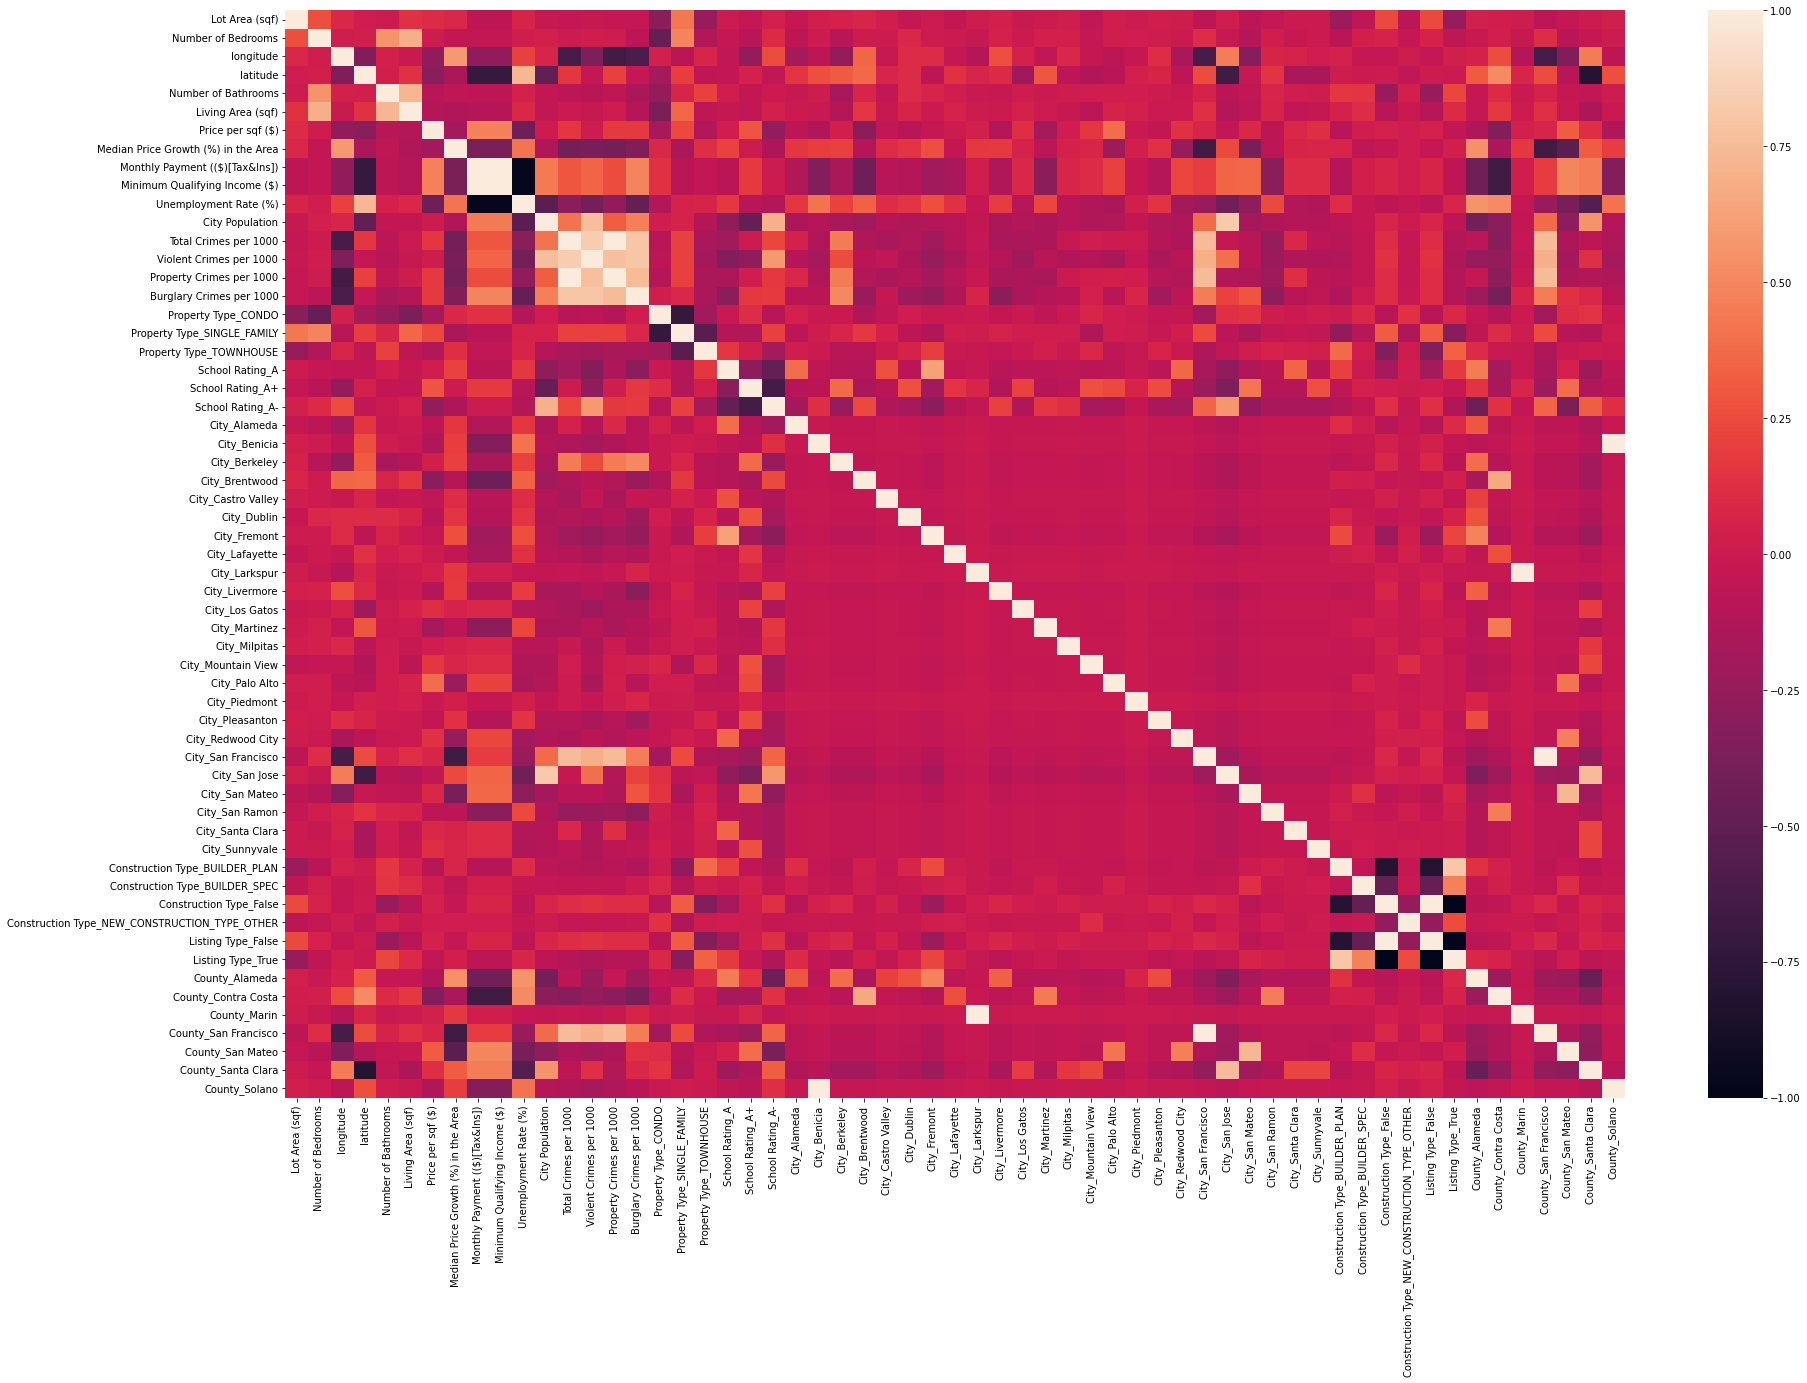

In [68]:
#plotting correlation between all features (numerical and categorical, after getting dummies)
plt.figure(figsize=(30,20))
_ = sns.heatmap(final_data.corr())


In [69]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 59 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lot Area (sqf)                                 2237 non-null   float64
 1   Number of Bedrooms                             2237 non-null   float64
 2   longitude                                      2237 non-null   float64
 3   latitude                                       2237 non-null   float64
 4   Number of Bathrooms                            2237 non-null   float64
 5   Living Area (sqf)                              2237 non-null   float64
 6   Price per sqf ($)                              2237 non-null   float64
 7   Median Price Growth (%) in the Area            2237 non-null   float64
 8   Monthly Payment (($)[Tax&Ins])                 2237 non-null   int64  
 9   Minimum Qualifying Income ($)                  2237 

In [70]:
final_data.columns

Index(['Lot Area (sqf)', 'Number of Bedrooms', 'longitude', 'latitude',
       'Number of Bathrooms', 'Living Area (sqf)', 'Price per sqf ($)',
       'Median Price Growth (%) in the Area', 'Monthly Payment (($)[Tax&Ins])',
       'Minimum Qualifying Income ($)', 'Unemployment Rate (%)',
       'City Population', 'Total Crimes per 1000', 'Violent Crimes per 1000',
       'Property Crimes per 1000', 'Burglary Crimes per 1000',
       'Property Type_CONDO', 'Property Type_SINGLE_FAMILY',
       'Property Type_TOWNHOUSE', 'School Rating_A', 'School Rating_A+',
       'School Rating_A-', 'City_Alameda', 'City_Benicia', 'City_Berkeley',
       'City_Brentwood', 'City_Castro Valley', 'City_Dublin', 'City_Fremont',
       'City_Lafayette', 'City_Larkspur', 'City_Livermore', 'City_Los Gatos',
       'City_Martinez', 'City_Milpitas', 'City_Mountain View',
       'City_Palo Alto', 'City_Piedmont', 'City_Pleasanton',
       'City_Redwood City', 'City_San Francisco', 'City_San Jose',
       'City_

In [71]:
final_data.describe()

,Lot Area (sqf),Number of Bedrooms,longitude,latitude,Number of Bathrooms,Living Area (sqf),Price per sqf ($),Median Price Growth (%) in the Area,Monthly Payment (($)[Tax&Ins]),Minimum Qualifying Income ($),...,Construction Type_NEW_CONSTRUCTION_TYPE_OTHER,Listing Type_False,Listing Type_True,County_Alameda,County_Contra Costa,County_Marin,County_San Francisco,County_San Mateo,County_Santa Clara,County_Solano
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,3389.141864,3.053643,-122.042571,37.573487,2.411712,1656.129638,838.648637,-2.113321,7240.335270,217210.058114,...,0.008046,0.890478,0.109522,0.278945,0.116674,0.002235,0.106840,0.118909,0.361198,0.015199
std,4336.127952,1.021583,0.222678,0.229990,0.881588,570.731462,320.010472,2.414449,1616.870894,48506.126827,...,0.089361,0.312362,0.312362,0.448581,0.321103,0.047235,0.308978,0.323754,0.480455,0.122371
min,0.000000,0.000000,-122.552390,37.097992,0.000000,205.000000,269.000000,-6.700000,2900.000000,87000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-122.252110,37.360924,2.000000,1231.000000,639.000000,-3.200000,6150.000000,184500.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2988.216000,3.000000,-121.972010,37.551180,2.000000,1598.000000,788.000000,-1.100000,8100.000000,243000.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6085.332000,4.000000,-121.878370,37.748350,3.000000,2027.000000,976.000000,0.000000,8230.000000,246900.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,149411.000000,9.000000,-121.492836,38.082703,8.000000,5768.000000,4271.000000,6.600000,9420.000000,282600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some counties have a higher impact on the price than others. To evaluate price per sqf depending on the area it is usefull to put longitude and latitude information on the graph.

In [72]:
import matplotlib
import matplotlib.pyplot as plt

img = matplotlib.image.imread('Bay Area Map.png')

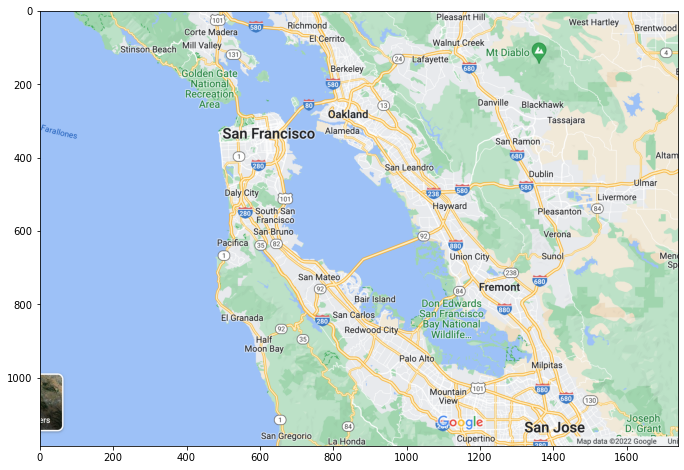

In [73]:
plt.figure(figsize=(15,8))
plt.imshow(img)


# Plotting Real Estate pricing information

Text(0.5, 1.0, 'Price per sqf ($) Distribution in Bay Area')

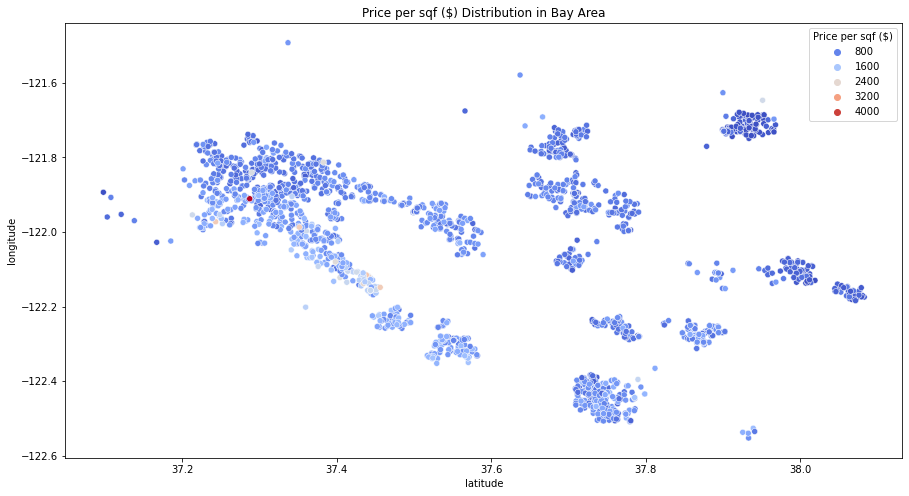

In [74]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data1, hue='Price per sqf ($)', palette = 'coolwarm')
plt.title ('Price per sqf ($) Distribution in Bay Area')

Price per sqf does not give significant information on each loccation. We can see that in San Francisco city there are some properties with very high price per sqf, as well as very low. On the side of the Bay further from the ocean property price per sqf is lower.

Text(0.5, 1.0, 'Median Home Price in Bay Area')

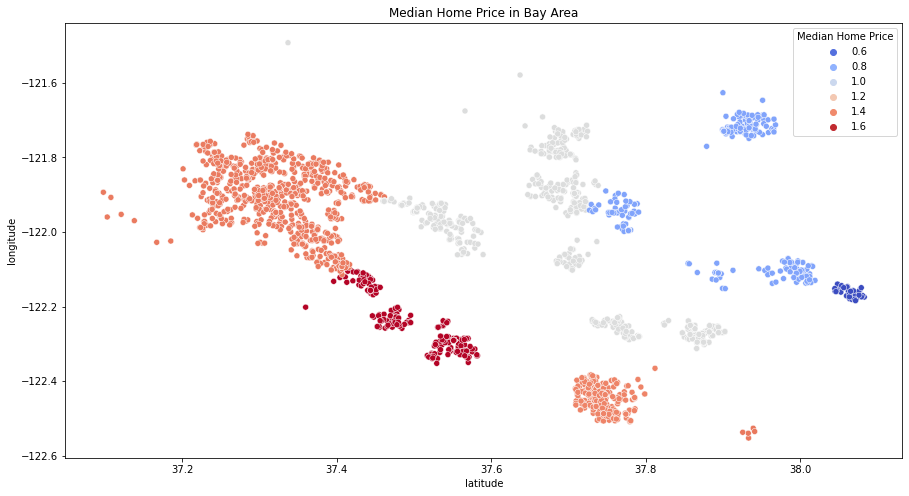

In [75]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data= data, hue = 'Median Home Price', palette='coolwarm')
plt.title ('Median Home Price in Bay Area')

Median house prices shows significant higher real estate prices in San Mateo, Redwood City, Palo Alto areas. High prices in San Francisco city and San Jose, Sunnyvale areas.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

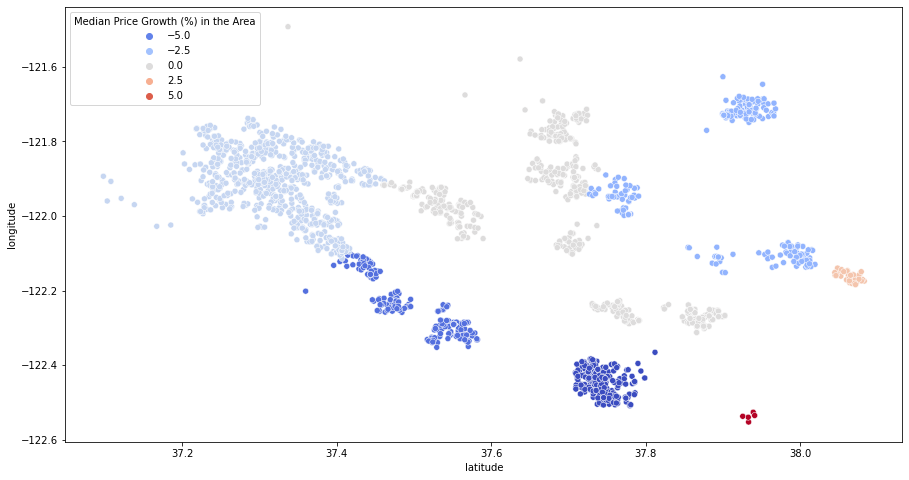

In [76]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data1, hue = 'Median Price Growth (%) in the Area', palette='coolwarm')

Highest price growth is in San Jose, Sunnyvale Area, Oakland, Berkeley,Piedmont prices were stable. 

In [77]:
# scaling data:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_data)


In [78]:
scaled_df = pd.DataFrame(scaled_df, columns= 
['Lot Area (sqf)', 'Number of Bedrooms', 'longitude', 'latitude',
       'Number of Bathrooms', 'Living Area (sqf)', 'Price per sqf ($)',
       'Median Price Growth (%) in the Area', 'Monthly Payment (($)[Tax&Ins])',
       'Minimum Qualifying Income ($)', 'Unemployment Rate (%)',
       'City Population', 'Total Crimes per 1000', 'Violent Crimes per 1000',
       'Property Crimes per 1000', 'Burglary Crimes per 1000',
       'Property Type_CONDO', 'Property Type_SINGLE_FAMILY',
       'Property Type_TOWNHOUSE', 'School Rating_A', 'School Rating_A+',
       'School Rating_A-', 'City_Alameda', 'City_Benicia', 'City_Berkeley',
       'City_Brentwood', 'City_Castro Valley', 'City_Dublin', 'City_Fremont',
       'City_Lafayette', 'City_Larkspur', 'City_Livermore', 'City_Los Gatos',
       'City_Martinez', 'City_Milpitas', 'City_Mountain View',
       'City_Palo Alto', 'City_Piedmont', 'City_Pleasanton',
       'City_Redwood City', 'City_San Francisco', 'City_San Jose',
       'City_San Mateo', 'City_San Ramon', 'City_Santa Clara',
       'City_Sunnyvale', 'Construction Type_BUILDER_PLAN',
       'Construction Type_BUILDER_SPEC', 'Construction Type_False',
       'Construction Type_NEW_CONSTRUCTION_TYPE_OTHER', 'Listing Type_False',
       'Listing Type_True', 'County_Alameda', 'County_Contra Costa',
       'County_Marin', 'County_San Francisco', 'County_San Mateo',
       'County_Santa Clara', 'County_Solano'])

In [79]:
scaled_df.head()

,Lot Area (sqf),Number of Bedrooms,longitude,latitude,Number of Bathrooms,Living Area (sqf),Price per sqf ($),Median Price Growth (%) in the Area,Monthly Payment (($)[Tax&Ins]),Minimum Qualifying Income ($),...,Construction Type_NEW_CONSTRUCTION_TYPE_OTHER,Listing Type_False,Listing Type_True,County_Alameda,County_Contra Costa,County_Marin,County_San Francisco,County_San Mateo,County_Santa Clara,County_Solano
0,-0.089468,-1.031613,-1.911926,0.793702,-1.601687,-1.083290,0.376170,-1.900104,0.531803,0.531803,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
1,-0.060930,0.926570,-1.866694,0.627266,-0.467116,0.331001,-1.099112,-1.900104,0.531803,0.531803,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
2,-0.206026,0.926570,-1.558108,0.709505,1.802024,1.356230,-1.342908,-1.900104,0.531803,0.531803,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
3,-0.081430,-0.052522,-1.760329,0.761606,-1.601687,-0.326198,-0.498997,-1.900104,0.531803,0.531803,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
4,-0.378853,-1.031613,-2.015777,0.790166,-1.601687,-1.106073,0.391798,-1.900104,0.531803,0.531803,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232


In [80]:
#sns.pairplot(scaled_df)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X= scaled_df.drop("Price per sqf ($)", axis=1)

y = scaled_df['Price per sqf ($)']

In [83]:
X

,Lot Area (sqf),Number of Bedrooms,longitude,latitude,Number of Bathrooms,Living Area (sqf),Median Price Growth (%) in the Area,Monthly Payment (($)[Tax&Ins]),Minimum Qualifying Income ($),Unemployment Rate (%),...,Construction Type_NEW_CONSTRUCTION_TYPE_OTHER,Listing Type_False,Listing Type_True,County_Alameda,County_Contra Costa,County_Marin,County_San Francisco,County_San Mateo,County_Santa Clara,County_Solano
0,-0.089468,-1.031613,-1.911926,0.793702,-1.601687,-1.083290,-1.900104,0.531803,0.531803,-0.660327,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
1,-0.060930,0.926570,-1.866694,0.627266,-0.467116,0.331001,-1.900104,0.531803,0.531803,-0.660327,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
2,-0.206026,0.926570,-1.558108,0.709505,1.802024,1.356230,-1.900104,0.531803,0.531803,-0.660327,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
3,-0.081430,-0.052522,-1.760329,0.761606,-1.601687,-0.326198,-1.900104,0.531803,0.531803,-0.660327,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
4,-0.378853,-1.031613,-2.015777,0.790166,-1.601687,-1.106073,-1.900104,0.531803,0.531803,-0.660327,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,-0.04733,2.891338,-0.367365,-0.751951,-0.124232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1.064051,-0.052522,-2.171732,1.589611,-0.467116,0.120697,3.609631,0.649340,0.649340,-0.762485,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,21.12818,-0.345861,-0.367365,-0.751951,-0.124232
2233,-0.781715,0.926570,-2.290001,1.563430,0.667454,0.876037,3.609631,0.649340,0.649340,-0.762485,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,21.12818,-0.345861,-0.367365,-0.751951,-0.124232
2234,0.493375,-1.031613,-2.232124,1.561721,-0.467116,-0.185995,3.609631,0.649340,0.649340,-0.762485,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,21.12818,-0.345861,-0.367365,-0.751951,-0.124232
2235,-0.615927,-2.010705,-2.211259,1.597635,-1.601687,-1.665130,3.609631,0.649340,0.649340,-0.762485,...,-0.090065,0.350702,-0.350702,-0.621978,-0.363435,21.12818,-0.345861,-0.367365,-0.751951,-0.124232


In [84]:
y

0       0.376170
1      -1.099112
2      -1.342908
3      -0.498997
4       0.391798
          ...   
2232    1.898335
2233    0.269900
2234    1.098183
2235   -0.455239
2236    1.423245
Name: Price per sqf ($), Length: 2237, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [86]:
len(X_train)

1789

In [87]:
len(X_test)

448

# Modeling


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.learning_curve import validation_curve

# Random Forest Regression

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
from sklearn.metrics import r2_score

In [91]:
from sklearn.inspection import permutation_importance

In [139]:
rf = RandomForestRegressor(n_estimators=200,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))


In [140]:
# RF model evaluation using R squared method

r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.7103302464562098


In [141]:
#Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(mae_rf)

0.3608105789287436


In [142]:
from sklearn.metrics import mean_squared_error

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(mse_rf)

0.3125614916818601


In [143]:
rf.feature_importances_

array([7.78495441e-02, 1.87831537e-02, 1.70384280e-01, 2.04189609e-01,
       1.07486791e-02, 1.24143775e-01, 8.79651883e-04, 2.24711212e-02,
       2.08875933e-02, 4.98606781e-02, 1.16310136e-02, 4.65646837e-03,
       3.58905246e-03, 4.23646830e-03, 3.17802510e-03, 8.69505342e-03,
       8.18442224e-02, 8.16163862e-04, 5.93476433e-04, 5.85900267e-03,
       7.13856082e-03, 4.66496260e-05, 2.42374819e-06, 1.72135922e-05,
       3.91306911e-05, 4.14009181e-04, 1.09985373e-04, 4.04076410e-04,
       2.57895993e-04, 1.22279229e-04, 7.72364948e-05, 6.75767628e-04,
       4.86409070e-05, 9.22827541e-05, 8.21908306e-03, 1.46273489e-01,
       2.09516824e-05, 9.46124968e-05, 1.28018821e-04, 2.63552857e-07,
       2.22093796e-04, 2.73194685e-04, 1.90749029e-05, 1.31831101e-03,
       9.80060768e-04, 1.94062128e-04, 5.07546211e-04, 5.81120921e-04,
       8.09177671e-04, 7.02323588e-04, 1.08274757e-03, 3.86036487e-04,
       3.72904308e-05, 7.07488050e-05, 6.00230837e-05, 3.03219820e-03,
      

<BarContainer object of 58 artists>

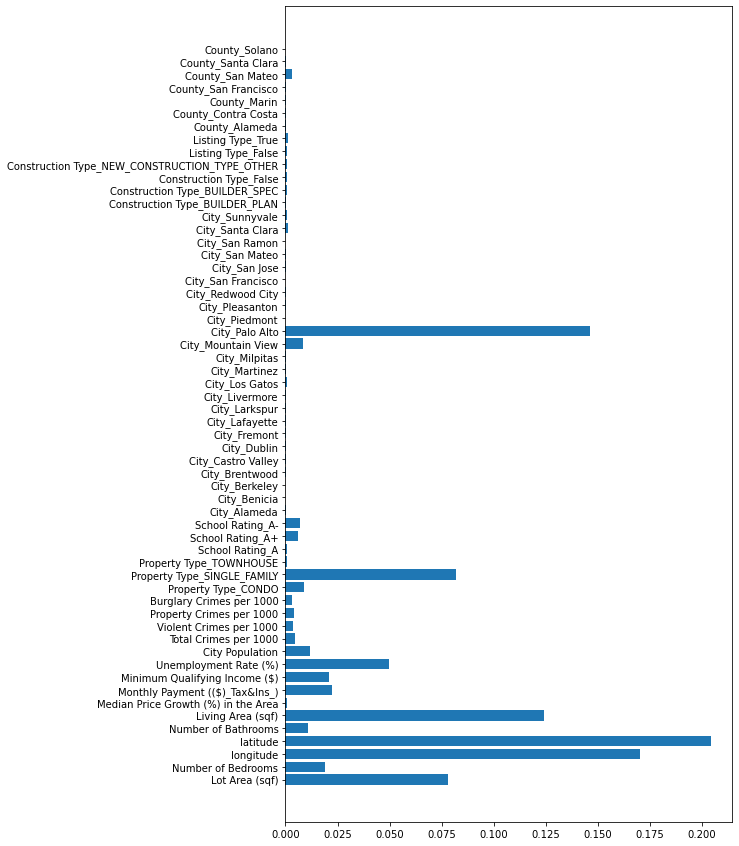

In [144]:
plt.figure(figsize=(8,15))

plt.barh(X_train.columns, rf.feature_importances_)


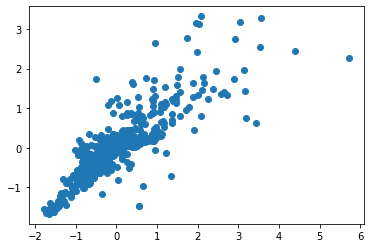

In [145]:
plt.scatter(y_test, y_pred_rf)

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


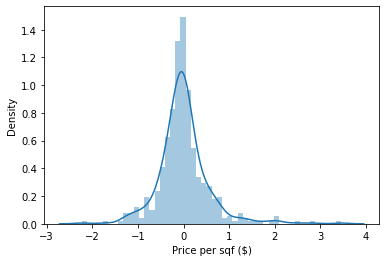

In [146]:
#plotting model to check normalization
sns.distplot((y_test-y_pred_rf), bins=50);

# Updating model using GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[200, 300, 400],
    'max_features':[10,12, 14]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=200),
             param_grid={'max_features': [10, 12, 14],
                         'n_estimators': [200, 300, 400]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [150]:
best_rf = grid_search.best_estimator_

In [151]:
best_rf.score(X_test, y_test)

0.7056801383068553

GridSearch provide almost same results as RandomForestRegressor.

# XGBoost

In [152]:
import re
import xgboost as xg

In [153]:
from xgboost import XGBRegressor

In [154]:
xgb_model = XGBRegressor()

In [155]:
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.7062112607052542

In [156]:
xgb_model_predict = xgb_model.predict(X_test)

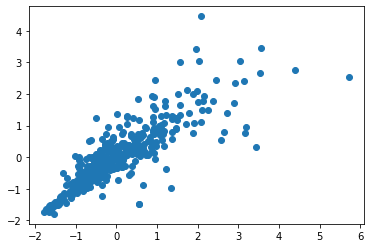

In [157]:
plt.scatter(y_test, xgb_model_predict)

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


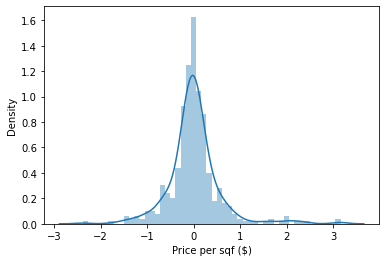

In [158]:
#plotting model to check normalization
sns.distplot((y_test-xgb_model_predict), bins=50);

# Removing additional data 


In [159]:


train_data = scaled_df.drop(columns=['Living Area (sqf)', 'latitude', 'longitude', 'Median Price Growth (%) in the Area',])



In [160]:
X= train_data.drop("Price per sqf ($)", axis=1)

y = train_data['Price per sqf ($)']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [165]:
rf = RandomForestRegressor(n_estimators=500,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))


In [166]:
r2_score(y_pred_rf, y_test)

0.4271068289696365

In [167]:
from sklearn.metrics import r2_score



In [168]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.4954840538280081


In [169]:
from sklearn.metrics import mean_absolute_error
y_pred_rf= rf.predict((X_test))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(mae_rf)

0.4569814246426253


In [170]:
from sklearn.metrics import mean_squared_error

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(mse_rf)

0.5443863392142666


In [171]:
rf.feature_importances_

array([1.92378363e-01, 6.93881223e-02, 5.34569245e-02, 5.42608380e-02,
       5.08134394e-02, 8.16122105e-02, 2.01623816e-02, 1.56281210e-02,
       1.51361861e-02, 8.07150534e-03, 2.40652985e-02, 9.60211767e-03,
       1.02808480e-01, 1.71149995e-03, 1.00563713e-03, 4.67150565e-03,
       8.73568774e-02, 2.77820341e-04, 1.97241023e-04, 3.14072972e-04,
       3.74284120e-04, 3.51240651e-04, 3.09608481e-04, 5.73229187e-04,
       5.30148819e-04, 3.08696333e-05, 9.83752308e-04, 1.35604569e-03,
       1.33813134e-04, 2.75726361e-04, 1.91901574e-02, 1.53203732e-01,
       2.30926810e-05, 1.98451209e-04, 4.27882333e-04, 3.49674876e-04,
       7.51705435e-04, 1.19977982e-03, 1.45905198e-04, 2.51095169e-03,
       6.18203683e-03, 6.89986251e-04, 1.19991895e-03, 2.89378948e-03,
       4.53880715e-04, 2.81138618e-03, 4.43937692e-03, 1.92864334e-03,
       3.29846778e-04, 2.10921919e-05, 3.85137935e-04, 1.66411554e-03,
       9.28247075e-04, 2.33848608e-04])

<BarContainer object of 54 artists>

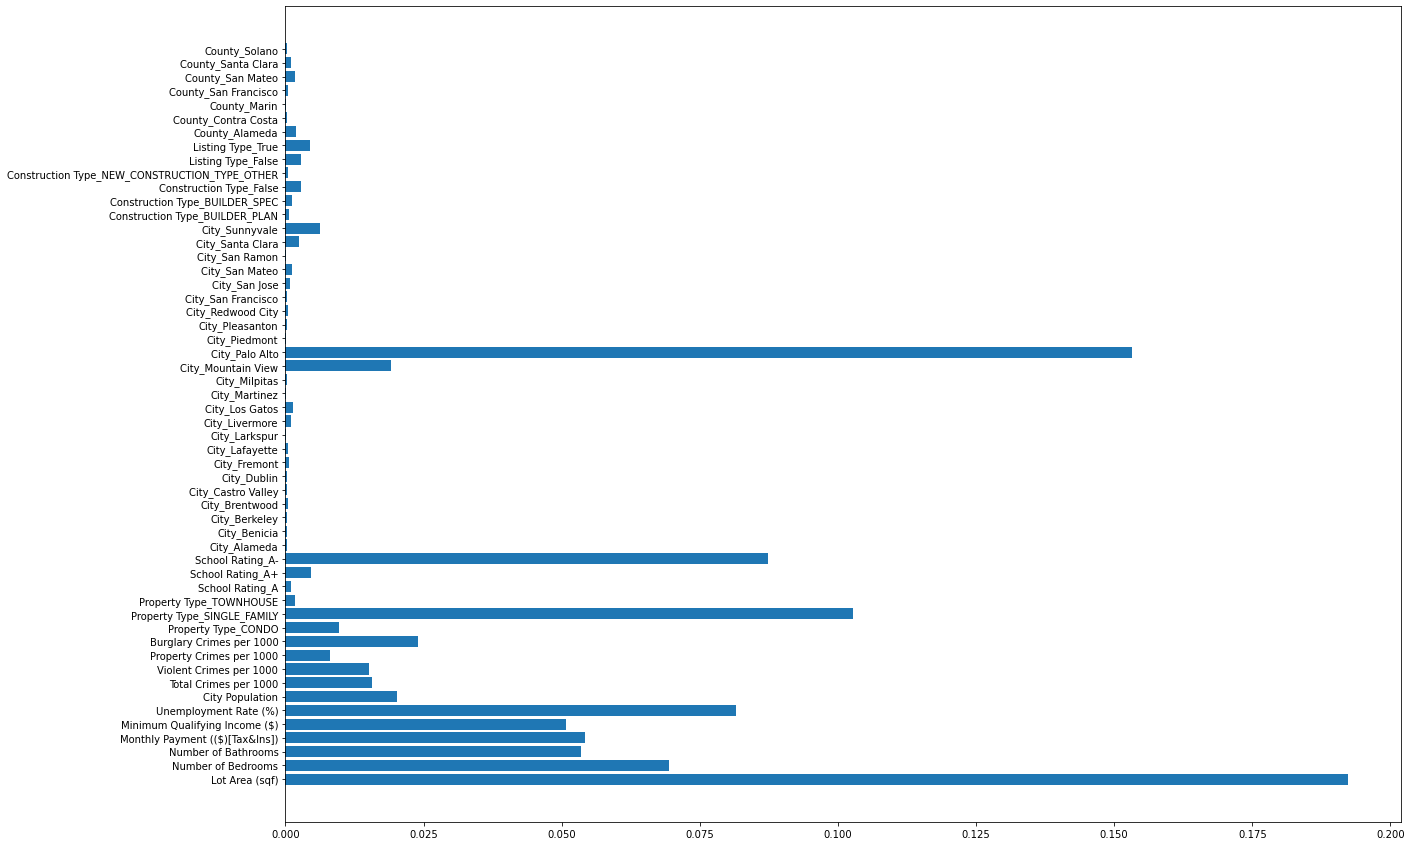

In [172]:
plt.figure(figsize=(20,15))

plt.barh(X_train.columns, rf.feature_importances_)

**After removing additional data significant features:** <br> Lot Area, <br> City_Palo_Alto, <br> Single Family Houses, <br> School Rating A-. 

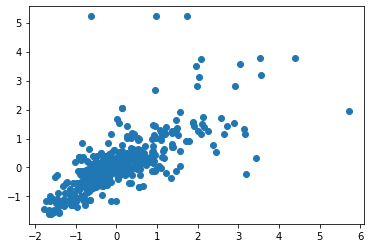

In [173]:
#plotting predicted and tested values
plt.scatter(y_test, y_pred_rf)

**Evaluating model on two types of data in price prediction:**<br> Price prediction in Counties; <br> Price prediction in Cities

# Price predictions in counties


In [174]:
counties_data = train_data.drop(columns=
['City_Benicia',
'City_Berkeley',
'City_Brentwood',
'City_Castro Valley',
'City_Dublin',
'City_Fremont',
'City_Lafayette',
'City_Larkspur',
'City_Livermore',
'City_Los Gatos',
'City_Martinez',
'City_Milpitas',
'City_Mountain View',
'City_Palo Alto',
'City_Piedmont',
'City_Pleasanton',
'City_Redwood City',
'City_San Francisco',
'City_San Jose',
'City_San Mateo',
'City_San Ramon',
'City_Santa Clara',
'City_Sunnyvale'])


In [175]:
X= counties_data.drop("Price per sqf ($)", axis=1)

y = counties_data['Price per sqf ($)']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [177]:
rf = RandomForestRegressor(n_estimators=500,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))


def accuracy(y_pred_rf, y_test):
    return np.sum(y_pred_rf==y_test)/len(y_test)

acc=accuracy(y_test, y_pred_rf)
print(acc)

0.0


In [178]:
from sklearn.metrics import r2_score

In [179]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.470732351126795


In [180]:
from sklearn.metrics import mean_absolute_error
y_pred_rf= rf.predict((X_test))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(mae_rf)

0.4651933315202795


In [181]:
from sklearn.metrics import mean_squared_error

mse_rf = mean_squared_error(y_test, y_pred_rf)

print(mse_rf)

0.5710940952823768


In [182]:
rf.feature_importances_

array([2.22025308e-01, 7.55302608e-02, 5.77700773e-02, 5.76364268e-02,
       5.40584044e-02, 9.89333867e-02, 5.53095331e-02, 2.38464078e-02,
       3.66946402e-02, 2.61356878e-02, 4.01577761e-02, 5.20563230e-03,
       1.09480363e-01, 2.27701069e-03, 1.93889802e-03, 1.33340409e-02,
       9.31572143e-02, 1.00172257e-03, 7.87491098e-04, 1.38557555e-03,
       2.52895227e-03, 5.65580214e-04, 2.30943156e-03, 5.45982984e-03,
       1.69482811e-03, 3.34699354e-04, 3.82058692e-05, 5.32378603e-04,
       6.73375542e-03, 2.92787895e-03, 2.08602277e-04])

<BarContainer object of 31 artists>

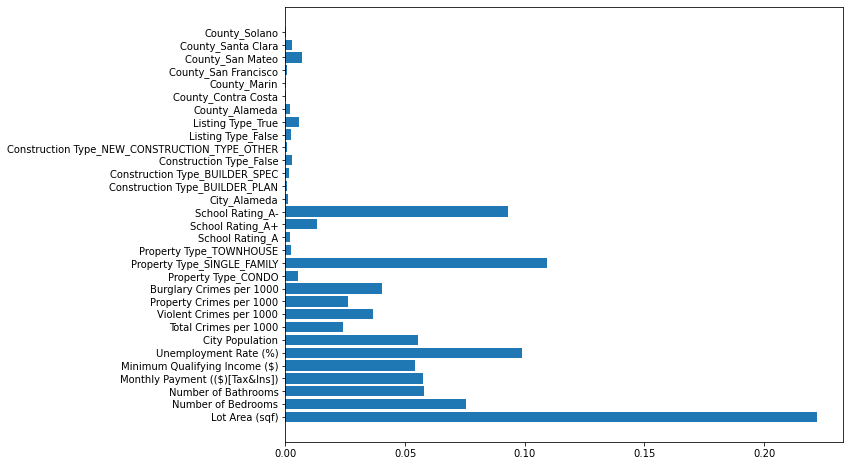

In [183]:
plt.figure(figsize=(10,8))

plt.barh(X_train.columns, rf.feature_importances_)

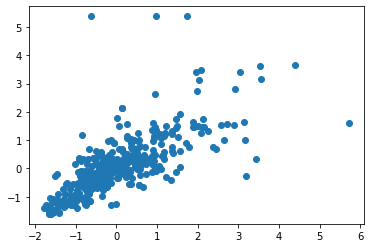

In [184]:
plt.scatter(y_test, y_pred_rf)

Model is giving only slightly better results of r2 than calculating counties and cities together.

# Price predictions in cities

In [185]:
cities_data = train_data.drop(columns=
[
'County_Alameda', 
'County_Contra Costa',
'County_Marin',
'County_San Francisco', 
'County_San Mateo',
'County_Santa Clara', 
'County_Solano'])


In [186]:
X = cities_data.drop("Price per sqf ($)", axis=1)

y = cities_data['Price per sqf ($)']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [188]:
rf = RandomForestRegressor(n_estimators=200,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))


def accuracy(y_pred_rf, y_test):
    return np.sum(y_pred_rf==y_test)/len(y_test)

acc=accuracy(y_test, y_pred_rf)
print(acc)

0.0


In [189]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.506591357351468


In [190]:
rf.feature_importances_

array([1.88580106e-01, 6.92070752e-02, 5.38991685e-02, 6.14310320e-02,
       5.01549130e-02, 8.16229617e-02, 1.51750301e-02, 1.87190497e-02,
       1.67510334e-02, 7.79069660e-03, 2.87214307e-02, 7.97993186e-03,
       1.06578723e-01, 1.39442127e-03, 7.27612174e-04, 5.84309621e-03,
       7.48001371e-02, 3.40745960e-04, 1.30989299e-04, 5.23299910e-04,
       2.86460739e-04, 4.48934882e-04, 2.54560234e-04, 6.53545060e-04,
       4.06023847e-04, 1.32340646e-05, 1.26712187e-03, 1.30493740e-03,
       1.31135693e-04, 3.67875861e-04, 2.11985649e-02, 1.56266068e-01,
       1.92789514e-05, 1.93597661e-04, 3.92409898e-04, 5.20386259e-04,
       9.04871588e-04, 1.02627661e-03, 1.37790499e-04, 4.16608904e-03,
       7.40949365e-03, 7.95137521e-04, 1.29860194e-03, 2.39406677e-03,
       5.82518797e-04, 3.02221315e-03, 4.16735168e-03])

<BarContainer object of 47 artists>

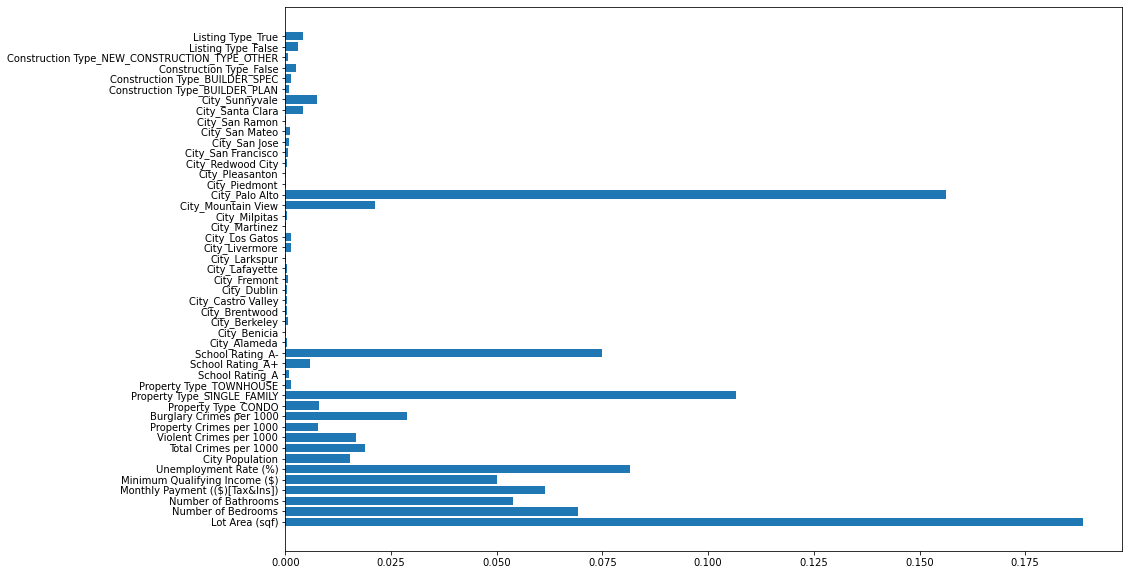

In [191]:
plt.figure(figsize=(15,10))

plt.barh(X_train.columns, rf.feature_importances_)

# Price prediction only for Palo Alto city

In [192]:
Palo_Alto_data = cities_data.drop(columns=
['City_Benicia',
'City_Alameda',
'City_Berkeley',
'City_Brentwood',
'City_Castro Valley',
'City_Dublin',
'City_Fremont',
'City_Lafayette',
'City_Larkspur',
'City_Livermore',
'City_Los Gatos',
'City_Martinez',
'City_Milpitas',
'City_Mountain View',
'City_Piedmont',
'City_Pleasanton',
'City_Redwood City',
'City_San Francisco',
'City_San Jose',
'City_San Mateo',
'City_San Ramon',
'City_Santa Clara',
'City_Sunnyvale'])

In [193]:
X_pa = Palo_Alto_data.drop("Price per sqf ($)", axis=1)

y_pa = Palo_Alto_data['Price per sqf ($)']

In [194]:
X_pa_train, X_pa_test, y_pa_train, y_pa_test = train_test_split(X_pa,y_pa,test_size = 0.2, random_state = 20)



In [195]:
rf_pa = RandomForestRegressor(n_estimators=200,max_depth=10)
rf_pa.fit(X_pa_train, y_pa_train)
y_pa_pred_rf= rf_pa.predict((X_pa_test))


def accuracy(y_pa_pred_rf, y_pa_test):
    return np.sum(y_pa_pred_rf==y_pa_test)/len(y_pa_test)

acc=accuracy(y_pa_test, y_pa_pred_rf)
print(acc)

0.0


In [196]:
r2_pa = r2_score(y_pa_test, y_pa_pred_rf)
print(r2_pa)

0.4906557968399662


In [197]:
rf_pa.feature_importances_

array([0.20182271, 0.07280281, 0.05534423, 0.05099515, 0.05161741,
       0.09166903, 0.02349832, 0.02006781, 0.02406886, 0.01274625,
       0.02654395, 0.00860876, 0.10319719, 0.00156964, 0.0015455 ,
       0.00812652, 0.08727224, 0.14604956, 0.00068325, 0.00168275,
       0.00244234, 0.00068696, 0.00232374, 0.00463502])

<BarContainer object of 24 artists>

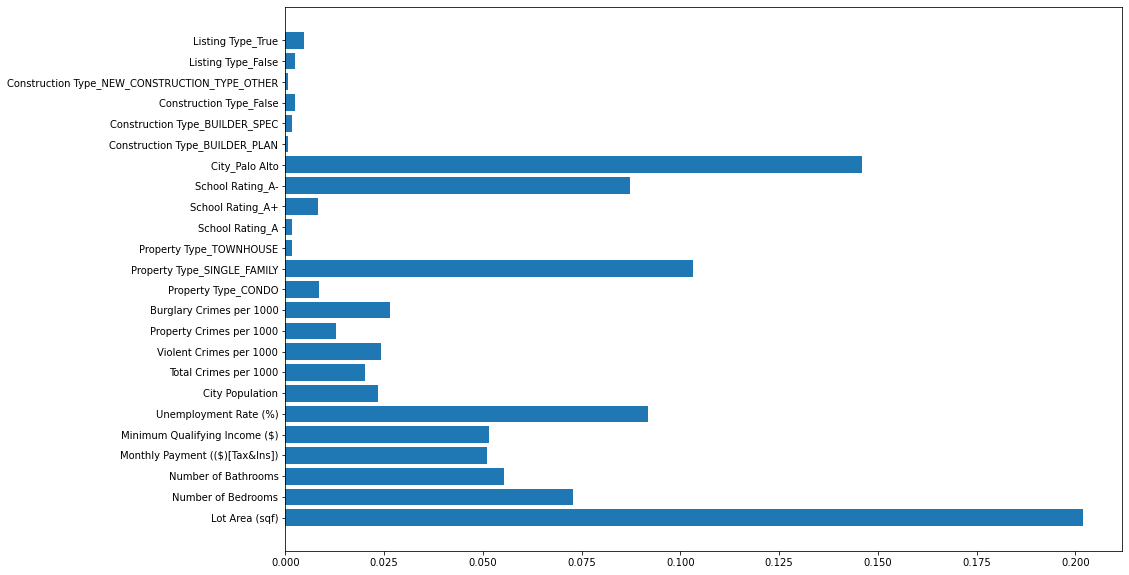

In [198]:
plt.figure(figsize=(15,10))

plt.barh(X_pa_train.columns, rf_pa.feature_importances_)

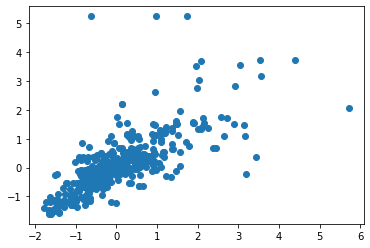

In [199]:
plt.scatter(y_pa_test, y_pa_pred_rf)

In [200]:
train_data.columns


Index(['Lot Area (sqf)', 'Number of Bedrooms', 'Number of Bathrooms',
       'Price per sqf ($)', 'Monthly Payment (($)[Tax&Ins])',
       'Minimum Qualifying Income ($)', 'Unemployment Rate (%)',
       'City Population', 'Total Crimes per 1000', 'Violent Crimes per 1000',
       'Property Crimes per 1000', 'Burglary Crimes per 1000',
       'Property Type_CONDO', 'Property Type_SINGLE_FAMILY',
       'Property Type_TOWNHOUSE', 'School Rating_A', 'School Rating_A+',
       'School Rating_A-', 'City_Alameda', 'City_Benicia', 'City_Berkeley',
       'City_Brentwood', 'City_Castro Valley', 'City_Dublin', 'City_Fremont',
       'City_Lafayette', 'City_Larkspur', 'City_Livermore', 'City_Los Gatos',
       'City_Martinez', 'City_Milpitas', 'City_Mountain View',
       'City_Palo Alto', 'City_Piedmont', 'City_Pleasanton',
       'City_Redwood City', 'City_San Francisco', 'City_San Jose',
       'City_San Mateo', 'City_San Ramon', 'City_Santa Clara',
       'City_Sunnyvale', 'Construction Typ

In [201]:
test_data = train_data.drop(columns=[
       'Property Type_CONDO',
    'Property Type_TOWNHOUSE',
       'School Rating_A', 'School Rating_A+',
       'School Rating_A-', 'City_Alameda', 'City_Benicia', 'City_Berkeley',
       'City_Brentwood', 'City_Castro Valley', 'City_Dublin', 'City_Fremont',
       'City_Lafayette', 'City_Larkspur', 'City_Livermore', 'City_Los Gatos',
       'City_Martinez', 'City_Milpitas', 
       'City_Piedmont', 'City_Pleasanton',
       'City_Redwood City', 'City_San Francisco', 'City_San Jose',
       'City_San Mateo', 'City_San Ramon', 'City_Santa Clara',
       'Construction Type_BUILDER_PLAN',
       'Construction Type_BUILDER_SPEC', 'Construction Type_False',
       'Construction Type_NEW_CONSTRUCTION_TYPE_OTHER', 'Listing Type_False',
       'Listing Type_True', 'County_Alameda', 'County_San Mateo', 'County_Santa Clara','County_Contra Costa',
       'County_Marin', 'County_San Francisco', 
        'County_Solano'
])

In [202]:
X_f = test_data.drop("Price per sqf ($)", axis=1)

y_f = test_data['Price per sqf ($)']

In [203]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f,y_f,test_size = 0.2, random_state = 20)


In [204]:
rf_f = RandomForestRegressor(n_estimators=200,max_depth=10)
rf_f.fit(X_f_train, y_f_train)
y_f_pred_rf= rf_f.predict((X_f_test))



0.0


In [205]:
r2_f = r2_score(y_f_test, y_f_pred_rf)
print(r2_f)

0.5102856098828974


In [206]:
rf_f.feature_importances_

array([0.20118275, 0.07501575, 0.05480633, 0.05496237, 0.05473878,
       0.08510981, 0.08558783, 0.02470573, 0.03627119, 0.01139912,
       0.03015744, 0.10670316, 0.02061035, 0.15170374, 0.00704565])

<BarContainer object of 15 artists>

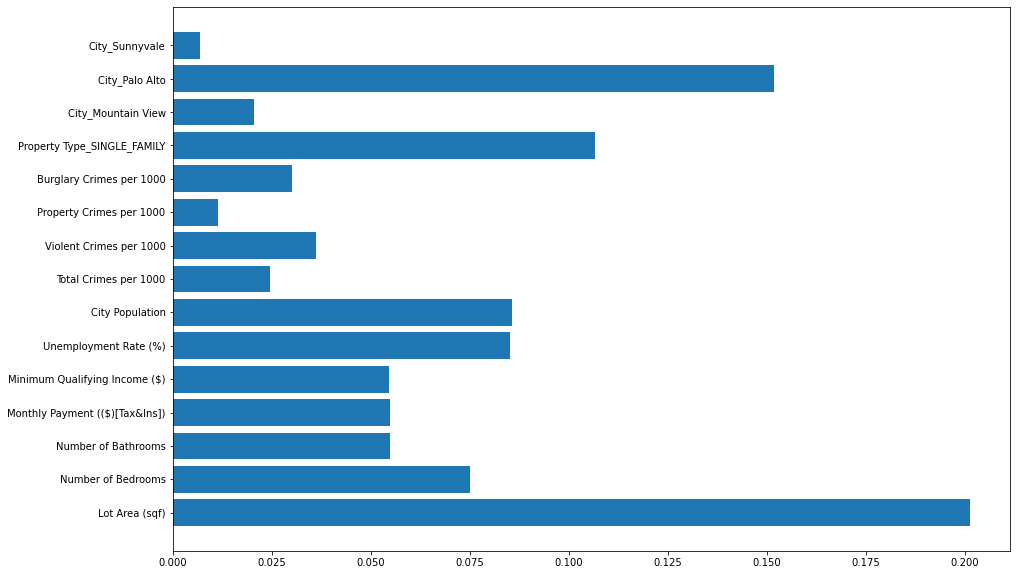

In [207]:
plt.figure(figsize=(15,10))

plt.barh(X_f_train.columns, rf_f.feature_importances_)

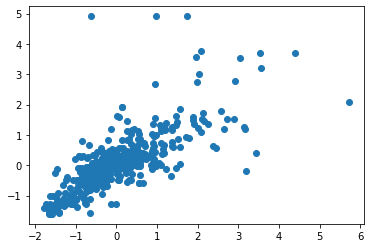

In [208]:
plt.scatter(y_f_test, y_f_pred_rf)

In [210]:

from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960319

# Linear Regression

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
X_linear= scaled_df.drop("Price per sqf ($)", axis=1)

y_linear = scaled_df['Price per sqf ($)']

In [213]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_linear,y_linear,test_size = 0.2, random_state = 20)

In [214]:
reg = LinearRegression()
reg.fit(Xl_train, yl_train)


LinearRegression()

In [215]:
#computing r^2
reg.score(X_linear, y_linear)

0.5734664364719696

In [216]:
reg.coef_

array([ 1.32494890e-02, -4.25349753e-02, -6.92271500e-01, -1.67779601e-01,
        5.92825612e-02, -2.68352089e-01,  5.84753718e+11, -3.17860826e+11,
        1.63508562e+11, -3.13949029e+11, -1.14310784e+11,  4.07820826e+10,
        1.16241837e+10,  1.86476016e+10, -1.43955477e+10, -6.14642454e+11,
       -7.11951502e+11, -5.02224221e+11,  3.55662251e+11, -2.90597860e+10,
        2.93290748e+10, -1.34048125e+11, -5.57062937e+10,  3.62897501e+10,
        1.71051226e+11, -8.38153823e+10,  4.48833195e+10, -1.79980793e+11,
        8.55342077e+10, -5.65288192e+10,  3.05154277e+10,  4.62118534e+10,
        1.21803377e+11,  2.16780721e+10,  4.99824855e+10,  2.42479234e+11,
        1.02844527e+10,  4.26585378e+10,  1.16142665e+11,  2.37308178e+11,
        1.84184761e+11,  4.20724133e+11,  1.41491049e+11, -1.13915211e+11,
        5.65644194e+10,  1.18097767e+11,  7.25943998e+10,  1.20120052e+12,
        4.01433103e+10, -2.21902992e+11,  8.38975456e+11,  6.49774575e+09,
        5.36761220e+10, -

In [217]:
#the intercept (often labeled the constant) is the expected mean value of Y when all X=0
reg.intercept_

0.004323472133328095

In [218]:
yl_pred = reg.predict(Xl_test)

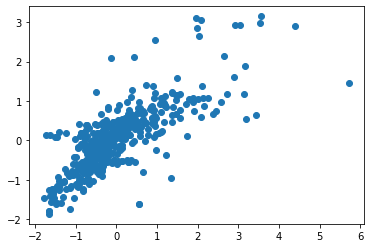

In [219]:
plt.scatter(yl_test, yl_pred)

# Cross Validation of Linear Regression Using 6 folds



In [220]:
from sklearn.model_selection import cross_val_score, KFold

In [221]:
kf = KFold(n_splits = 6, shuffle = True, random_state = 42)
reg=LinearRegression()
cv_results = cross_val_score(reg, X_linear, y_linear, cv=kf)
print(cv_results)

[0.53420255 0.52269035 0.60384761 0.56914653 0.39942946 0.64810969]


# Comparing Models

In [279]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import model_selection

In [280]:
models=[]

models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('XGB', XGBRegressor()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KN', KNeighborsRegressor()))




<b>Model Evaluation on The Training Data Set<b>

In [288]:
results = []
names = []

scoring = 'r2'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    r2_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(r2_cv)
    names.append(name)
    r2 = (name),'%s, %.3f, %.3f'% (r2_cv.mean(), r2_cv.var(), r2_cv.std())
    print(r2)

('RF', '0.6877121070968747, 0.011, 0.103')
('SVR', '0.5636343857844163, 0.007, 0.082')
('XGB', '0.6937961468043305, 0.020, 0.141')
('LR', '0.642629011741444, 0.016, 0.127')
('DT', '0.4007447803335545, 0.025, 0.159')
('KN', '0.5571668190704036, 0.007, 0.081')


In [289]:
results = []
names = []

scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    mse_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(mse_cv)
    names.append(name)
    mse = (name),'%s: %.3f, %.3f'% (mse_cv.mean(), mse_cv.var(), mse_cv.std())
    print(mse)

('RF', '-8.325791898474735: 8.631, 2.938')
('SVR', '-12.467314708609678: 22.504, 4.744')
('XGB', '-8.076991041233494: 5.462, 2.337')
('LR', '-9.59379223351357: 9.888, 3.144')
('DT', '-16.454324933939724: 16.795, 4.098')
('KN', '-12.275067834047775: 12.039, 3.470')


/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_1220/307164845.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


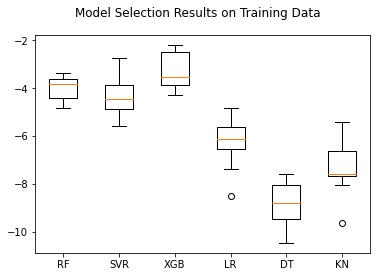

In [299]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

<b>Model Evaluation for The Testing Data Set<b>

In [296]:
results = []
names = []

scoring = 'r2'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    r2_cv = model_selection.cross_val_score(model, X_test, y_test, cv = kfold, scoring = scoring)
    results.append(r2_cv)
    names.append(name)
    r2 = (name),'%s, %.3f, %.3f'% (r2_cv.mean(), r2_cv.var(), r2_cv.std())
    print(r2)

('RF', '0.8417967378786372, 0.000, 0.016')
('SVR', '0.8294382161743158, 0.001, 0.028')
('XGB', '0.8718784410594658, 0.000, 0.022')
('LR', '0.7558127341398329, 0.001, 0.033')
('DT', '0.6284864228634666, 0.002, 0.045')
('KN', '0.7145379498379519, 0.001, 0.029')


In [297]:
results = []
names = []

scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    mse_cv = model_selection.cross_val_score(model, X_test, y_test, cv = kfold, scoring = scoring)
    results.append(mse_cv)
    names.append(name)
    mse = (name),'%s: %.3f, %.3f'% (mse_cv.mean(), mse_cv.var(), mse_cv.std())
    print(mse)

('RF', '-4.00328868696244: 0.220, 0.470')
('SVR', '-4.364071961754194: 0.630, 0.794')
('XGB', '-3.304435284905491: 0.547, 0.740')
('LR', '-6.249235745356753: 1.030, 1.015')
('DT', '-8.877631380206399: 0.881, 0.938')
('KN', '-7.328089661263055: 1.234, 1.111')


/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_1220/3512995687.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


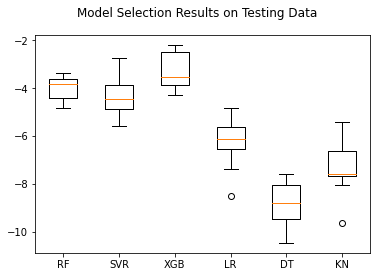

In [300]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Testing Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

Models performance on training and testing data differs quite a lot. However, on both training and testing datasets best performance is XGBoostRegressor, after RandomForestRegressor. 